In [6]:
from math import ceil
import matplotlib.pyplot as plt
from numpy import unravel_index

from math import ceil
import matplotlib.pyplot as plt
from numpy import unravel_index


def show_multiple_img(images, targets):
    """
    Visualizza una griglia di immagini con i relativi titoli.
    
    Questa funzione prende in input due liste: una di immagini e una di etichette corrispondenti (targets) e 
    le visualizza in una griglia. Il numero massimo di colonne è fissato a 6; il numero di righe è calcolato 
    in base al numero totale di immagini. Le dimensioni della figura sono adattate in base al numero di colonne e righe.
    
    :param images: Lista di immagini da visualizzare. Ogni elemento della lista è un'immagine che può essere visualizzata con plt.imshow.
    :param targets: Lista di etichette corrispondenti alle immagini. Ogni etichetta è visualizzata come titolo della rispettiva immagine.
    :return: None
    """

    # Determina il numero di colonne (limitato a un massimo di 6) e calcola il numero di righe necessarie.
    if len(images) < 6:
        my_cols = len(images)
    else:
        my_cols = 6
    my_rows = ceil(len(images) / my_cols)  # Calcola il numero di righe necessario.

    # Calcola le dimensioni della figura in base al numero di righe e colonne.
    fig_width = my_cols * 10 / 6  # Adatta la larghezza della figura.
    fig_height = my_rows * 10 / 4  # Adatta l'altezza della figura.

    # Crea la figura con le dimensioni calcolate.
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = fig.add_gridspec(my_rows, my_cols)  # Crea una griglia per le sottofigure.

    axes = []  # Lista per memorizzare gli assi delle sottofigure.
    matrix_dimension = (my_rows, my_cols)  # Dimensione della matrice per posizionare le sottofigure.
    for n, image in enumerate(images):
        subplot_position = unravel_index(n, matrix_dimension)  # Calcola la posizione della sottofigura.
        axes.append(fig.add_subplot(gs[subplot_position]))  # Aggiunge la sottofigura alla griglia.

    # Nasconde gli assi per tutte le sottofigure.
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    # Imposta i titoli e mostra le immagini nelle rispettive sottofigure.
    for ax, image, target in zip(axes, images, targets):
        ax.set_title(target)  # Imposta il titolo con l'etichetta corrispondente.
        ax.imshow(image, cmap=plt.cm.gray_r)  # Mostra l'immagine con colormap grigio invertito.
    
    plt.tight_layout()  # Ottimizza la disposizione delle sottofigure.
    plt.show()  # Visualizza la figura.


Importo il dataset che è già dentro a sklearn.datasets

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [8]:
dig = load_digits()

è una funzione che restituisce un dizionario con dei dati

In [9]:
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [10]:
dig.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

- 'feature_names'
- 'target_names'
- 'DECSR' è un testo che ci spiega tutto

In [11]:
print(dig.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Contiene le matrici delle immagini da riconoscere

In [12]:
dig.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

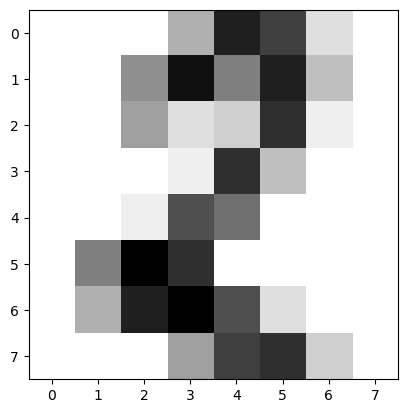

In [13]:
plt.imshow(dig.images[50], cmap=plt.cm.gray_r)

Righe da 64 numeri all'interno

In [14]:
dig.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Target contiene il valore, con index X, che dovrà i

In [15]:
dig.target[50]

2

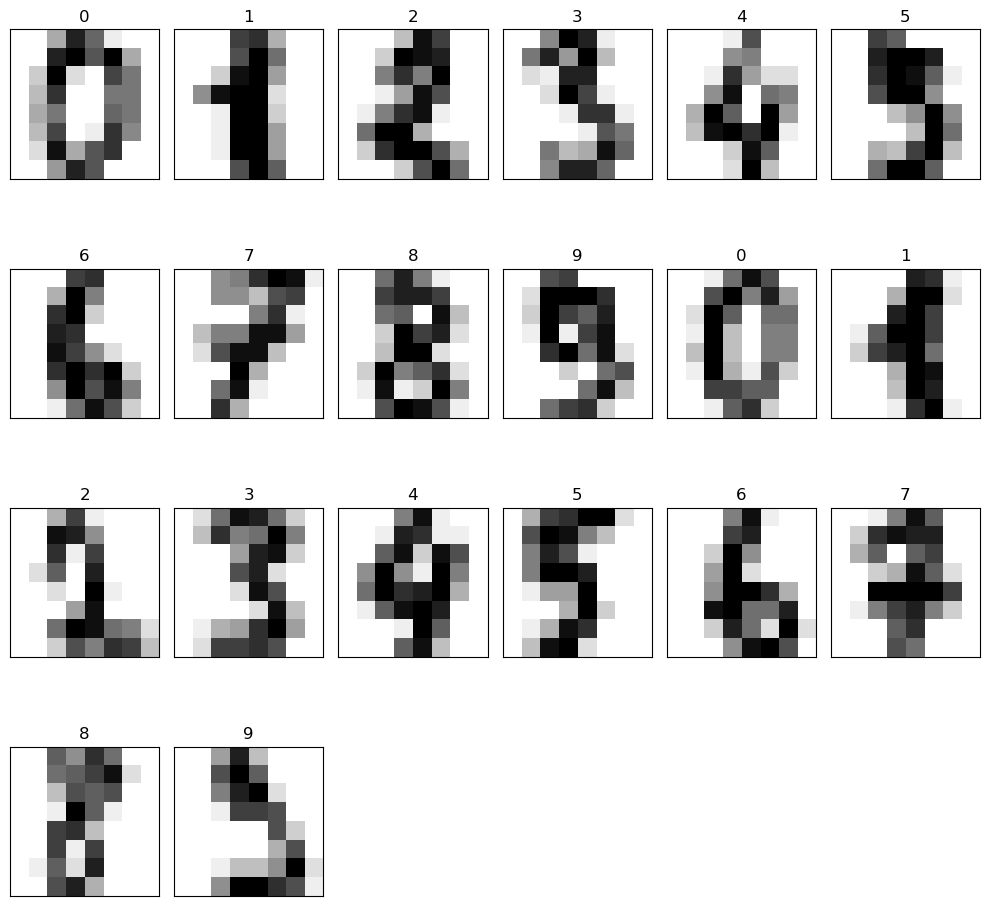

In [17]:
show_multiple_img(dig.images[0:20], dig.target[0:20])

'data' fa reshape della matrice che troviamo in 'images'

In [19]:
dig.data[0] #struttura pronta per algoritmo

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [21]:
dig.images[0] #struttura pronta per visualizzazione immagini

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [38]:
dig_df = pd.DataFrame(dig.data, columns= dig.feature_names)

In [39]:
dig_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [40]:
dig_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [41]:
dig_df.shape

(1797, 64)

In [43]:
dig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

Per contare i valori NA

In [76]:
dig_df.isna().sum().sum()

0

In [53]:
target_df = pd.DataFrame(dig.target)
target_df.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

Trasposto del dataframe di prima

In [56]:
dig_df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,4.593750,4.890625,5.375000,4.171875,4.031250,5.343750,4.781250,4.531250,5.578125,5.140625,...,4.937500,5.296875,5.609375,5.156250,5.421875,5.312500,6.234375,5.843750,5.375000,6.125000
std,5.224238,6.520096,6.348353,5.402982,5.681965,6.456739,6.206675,5.726487,6.268603,6.321712,...,6.148622,6.242913,6.703747,6.218811,6.436021,6.179523,6.541060,6.792196,6.257694,6.345852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,2.000000,0.500000,...,1.500000,1.000000,1.000000,1.000000,3.000000,3.500000,5.000000,1.000000,2.500000,4.500000
75%,9.000000,11.000000,11.250000,8.250000,7.250000,11.250000,11.250000,8.000000,12.000000,12.000000,...,10.000000,11.250000,12.500000,11.000000,12.250000,10.500000,13.250000,14.250000,10.500000,12.000000
max,15.000000,16.000000,16.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Si può modificare il numero di righe che si visualizzano

In [73]:
pd.set_option('display.max_row', 20)
dig_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_3,1797.0,12.089037,4.374694,0.0,11.0,13.0,16.0,16.0
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0


### Controllare di che tipo sono i dati di tutte le colonne!!!

In [60]:
dig_df.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object

In [74]:
dig_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


# Train test Split

In [78]:
from sklearn.model_selection import train_test_split

SEED = 42

- X maiuscolo è il nostro training set (maiuscola perché è una matrice bidimensionale)
- y minuscolo è il nostro test set

In [79]:
X = dig_df  # X 0 dig.data
y = target_df  # y = dig.target

### Riga standard che è il punto di partenza di ogni cosa che faremo

Shuffle lo fa in automatico la funzione train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1347, 64), (450, 64), (1347, 1), (450, 1))

In [89]:
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
678,0.0,0.0,2.0,15.0,15.0,16.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,15.0,7.0,0.0,0.0,0.0
1469,0.0,5.0,16.0,15.0,3.0,0.0,0.0,0.0,0.0,11.0,...,10.0,0.0,0.0,5.0,16.0,14.0,8.0,6.0,1.0,0.0
266,0.0,0.0,4.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,7.0,15.0,11.0,2.0,0.0,0.0
148,0.0,0.0,3.0,13.0,13.0,3.0,0.0,0.0,0.0,2.0,...,7.0,0.0,0.0,0.0,3.0,13.0,16.0,10.0,1.0,0.0
1476,0.0,0.0,3.0,13.0,16.0,16.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,15.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,1.0,13.0,16.0,16.0,12.0,1.0,0.0,0.0,12.0,...,9.0,0.0,0.0,1.0,14.0,16.0,16.0,11.0,1.0,0.0
1294,0.0,3.0,15.0,16.0,15.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,16.0,5.0,0.0,0.0,0.0,0.0
860,0.0,0.0,9.0,16.0,16.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,14.0,16.0,16.0,2.0,0.0
1459,0.0,0.0,1.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,7.0,0.0,0.0,0.0


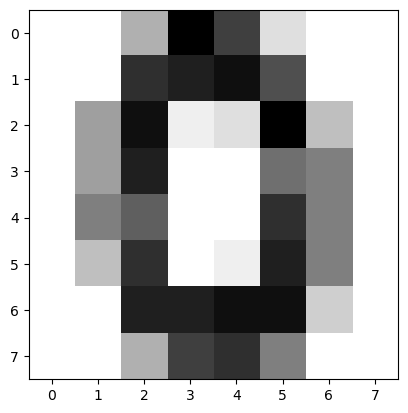

In [98]:
plt.imshow(np.array(X_train.iloc[7]).reshape(8,8), cmap='gray_r')

In [96]:
y_train.iloc[7]

0    0
Name: 682, dtype: int32